In [4]:
# !pip install wordcloud numpy scipy matplotlib pandas scikit-learn torch torchvision tqdm datasets torchtext

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from datasets import load_dataset, load_metric

dataset = load_dataset('wmt16', 'de-en')


Found cached dataset wmt16 (/home/aayush/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 4548885
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2169
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2999
    })
})

#### Part 1

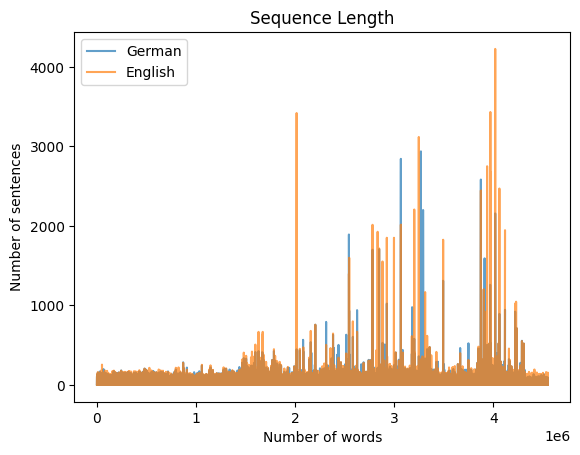

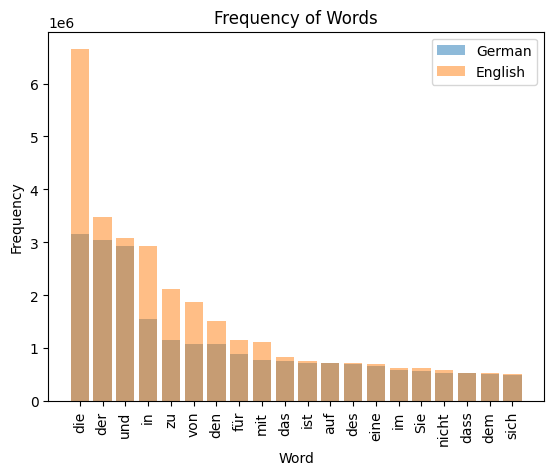

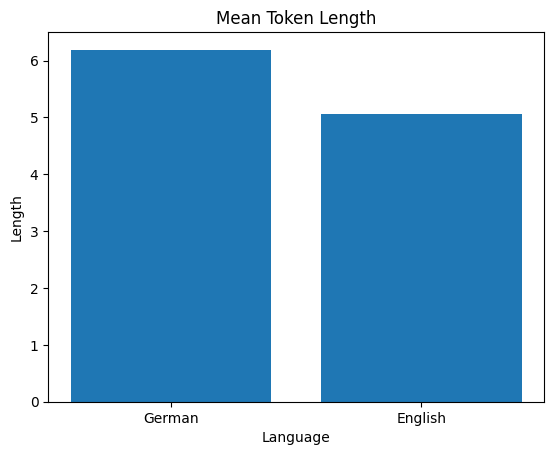

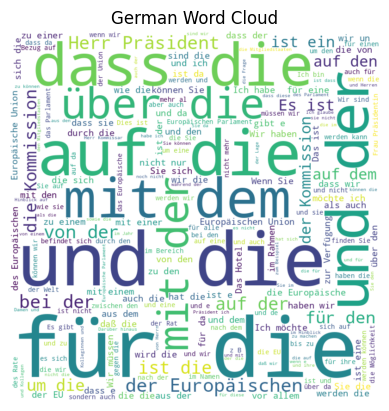

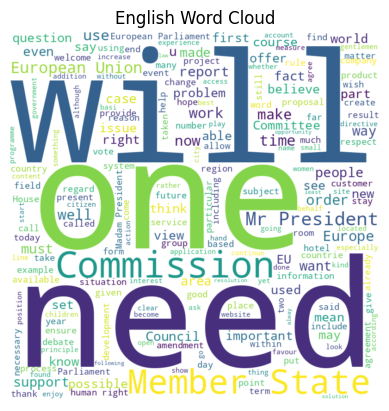

In [25]:
train_data = dataset['train']['translation']
val_data = dataset['validation']['translation']
test_data = dataset['test']['translation']

en_sentences = [example['en'] for example in train_data]
de_sentences = [example['de'] for example in train_data]
en_val = [example['en'] for example in val_data]
de_val = [example['de'] for example in val_data]
en_test = [example['en'] for example in test_data]
de_test = [example['de'] for example in test_data]

# de_sentences = dataset['train']['translation']['de']
# en_sentences = dataset['train']['translation']['en']

# Sequence length
de_seq_lens = [len(s.split()) for s in de_sentences]
en_seq_lens = [len(s.split()) for s in en_sentences]


plt.plot(de_seq_lens, label='German', alpha=0.7)
plt.plot(en_seq_lens, label='English', alpha=0.7)
plt.title('Sequence Length')
plt.xlabel('Number of words')
plt.ylabel('Number of sentences')
plt.legend()
plt.show()

# Frequency of words
de_words = Counter([w for s in de_sentences for w in s.split()])
en_words = Counter([w for s in en_sentences for w in s.split()])

plt.bar(np.arange(20), [w[1]
        for w in de_words.most_common(20)], alpha=0.5, label='German')
plt.bar(np.arange(20), [w[1] for w in en_words.most_common(
    20)], alpha=0.5, label='English')
plt.xticks(np.arange(20), [w[0]
           for w in de_words.most_common(20)], rotation=90)
plt.title('Frequency of Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Mean token length
de_mean_token_len = np.mean([len(w) for s in de_sentences for w in s.split()])
en_mean_token_len = np.mean([len(w) for s in en_sentences for w in s.split()])

plt.bar(['German', 'English'], [de_mean_token_len, en_mean_token_len])
plt.title('Mean Token Length')
plt.xlabel('Language')
plt.ylabel('Length')
plt.show()

# Word cloud
de_wordcloud = WordCloud(width=800, height=800,
                         background_color='white',
                         stopwords=None,
                         min_font_size=10).generate(' '.join(de_sentences))

en_wordcloud = WordCloud(width=800, height=800,
                         background_color='white',
                         stopwords=None,
                         min_font_size=10).generate(' '.join(en_sentences))

plt.imshow(de_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('German Word Cloud')
plt.show()

plt.imshow(en_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('English Word Cloud')
plt.show()

# Vocabulary overlap
vectorizer = CountVectorizer()
de_X = vectorizer.fit_transform(de_sentences)
# en


#### Part 2

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
import torchtext
import spacy


In [4]:

from transformers import AutoTokenizer

checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

source_lang = "en"
target_lang = "de"


/home/aayush/a/dl_assignments/.env/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [5]:
prefix = "translate English to French: "


def preprocess_function(examples):
    inputs = [prefix + example[source_lang]
              for example in examples["translation"]]
    targets = [example[target_lang] for example in examples["translation"]]
    model_inputs = tokenizer(inputs, text_target=targets,
                             max_length=128, truncation=True)
    return model_inputs


tokenized_data = dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Map:   0%|          | 0/2169 [00:00<?, ? examples/s]

Map:   0%|          | 0/2999 [00:00<?, ? examples/s]

In [8]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)


In [4]:
import torch.optim as optim
import torch.nn as nn
from transformers import AutoTokenizer
from datasets import load_dataset
import torch

'''
To implement Model A with non-contextualised initialised embeddings and LSTM using PyTorch, follow these steps:

1. Load the WNT16 dataset using HuggingFace:

'''

dataset_ = load_dataset('wmt16', 'de-en')
'''

2. Preprocess the dataset to convert the text into numerical form using tokenization and padding:

'''

tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')


Found cached dataset wmt16 (/home/aayush/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from torch.nn.utils.rnn import pad_sequence
prefix = "translate English to French: "

source_lang = "en"
target_lang = "de"


def preprocess_function(examples):
    inputs = [prefix + example[source_lang]
              for example in examples["translation"]]
    targets = [example[target_lang] for example in examples["translation"]]
    
    model_inputs = tokenizer(inputs, text_target=targets,
                             max_length=128, truncation=True)
    return model_inputs


def preprocess(data):
    input_ids = [torch.tensor(tokenizer.encode(
        text['en'], max_length=128, truncation=True)) for text in data['translation']]
    target_ids = [torch.tensor(tokenizer.encode(
        text['de'], max_length=128, truncation=True)) for text in data['translation']]
    
    input_ids = pad_sequence(input_ids, batch_first=True)
    target_ids = pad_sequence(
        target_ids, batch_first=True)
    data['input_ids'] = input_ids
    data['target_ids'] = target_ids
    return data

dataset = dataset_.map(preprocess_function, batched=True)




: 

In [6]:
'''

3. Split the dataset into training and validation sets:

'''
train_dataset = dataset['train']
val_dataset = dataset['validation']
